In [94]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio #1

In [4]:
# tu codigo aqui (~ 5 lineas de codigo):
a = np.arange(0,0.5,0.1)
b = np.arange(0.5,0.6,0.01)
c = np.arange(0.6,1.01,0.1)

xs = np.hstack((a,b,c))
print(xs)

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


Ejercicio #2

In [119]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#xs es "x suavizado", inicialmente es una copia de x
ys =  y.copy()

ys_left = np.append(ys[1:len(ys)],ys[0]) #Rotar los elementos a la izquierda
ys_right = np.append([ys[-1]],ys[0:len(ys)-1]) #Rotar los elementos a la derecha

ys = (ys_left+ys+ys_right)/3

print(ys)

[ 0.06613785 -0.15322631 -0.14123437 ... -0.46769125 -0.51433127
 -0.05458044]


In [120]:
ys = y

ys[2] = 5

print(y,ys)

[ 0.1684959  -0.29357702  5.         ... -1.21075661 -0.65573187
  0.32349466] [ 0.1684959  -0.29357702  5.         ... -1.21075661 -0.65573187
  0.32349466]


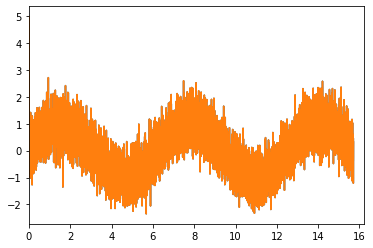

In [121]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

Ejercicio #3

In [139]:
# tu codigo aqui (~ 4 lineas de codigo)
def Calcula_Entropia (px):
    resp = -1*(px*np.log2(px))
    return resp
print (Calcula_Entropia([0.25,0.75]))

[0.5        0.31127812]


Ejercicio #4

In [127]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


**Ejercicio #5**

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [128]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    unique,counts = np.unique(x, return_counts=True)
    moda = {unique[np.argmax(counts)]:counts[np.argmax(counts)]} 
    return moda
    

In [132]:
#prueba
x = np.array([0, 100, 100, 80, 70, 80, 20, 10, 100, 100, 80, 70, 10, 30, 40])
print(mode(x))

{100: 4}


**Ejercicio #6**

In [133]:
dist_a = np.array([0.3,0.5,0.2])

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [147]:
# tu codigo aqui (~ 3 lineas de codigo)
def Calcula_Entropia (px):
    resp = sum(-1*(px*np.log2(px)))
    return resp

In [148]:
#prueba
print (Calcula_Entropia([0.25,0.25,0.25]))

1.5


**Ejercicio #7**

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [184]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    Y_hat[np.isnan(Y_hat)] = 0
    return sum(-1*(Y*np.log(Y_hat)))
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

**Ejercicio #8**

In [187]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

if magnitud(errores_modelo1) > magnitud(errores_modelo2): 
    print("El Modelo 1 Es Mejor")
else:
    print("El Modelo 2 Es Mejor")


# elegir el mejor modelo con una condicional(if)

El Modelo 1 Es Mejor


In [189]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return x/magnitud(x)
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


**Ejercicio #9**